In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score

print('done')

done


G:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
%%time 

df = pd.read_csv('Intermediate_data\Trimmed.csv', 
                 parse_dates = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'])

df['history'] = (df.issue_d - df.earliest_cr_line).dt.days 

df.drop(['Unnamed: 0'], axis = 1, inplace =  True)

print('done')

done
Wall time: 5min 2s


In [3]:
"""Consider only loans that completes the term """

df['termd'] = pd.to_timedelta(df.term, unit= 'M')

df_complete = df[df.issue_d + df.termd <df.issue_d.max()]

In [4]:
df_complete.drop(['last_pymnt_amnt', 'collection_recovery_fee', 'recoveries', 'out_prncp_inv', 
                  'out_prncp', 'int_rate', 'total_pymnt', 'total_pymnt_inv',
                  'total_rec_late_fee', 'total_rec_int', 'emp_title', 'debt_settlement_flag', 
                  'addr_state', 'purpose', 'delinq_amnt', 'hardship_flag', 'pymnt_plan', 
                  'earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'termd',
                  'last_credit_pull_d'],
                  axis = 1, inplace = True)

print('done')

done


G:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
cate_list = list(df_complete.dtypes[df_complete.dtypes == 'object'].index)

df_cate = df[cate_list]

df_cat_dum = pd.get_dummies(df_cate, drop_first = True)

print('done')

done


In [6]:
df_num_col = df_complete.dtypes[df_complete.dtypes == 'float64']

df_num = df[list(df_num_col.index)]

for col in df_num.columns:
    df_num[col].fillna(df_num[col].mean(), inplace = True)

df_combined = pd.concat([df_num, df_cat_dum], axis = 1)

y = df_combined['total_rec_prncp']
X = df_combined.drop(['total_rec_prncp'], axis = 1).values


print('done')

G:\Anaconda\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


done


In [7]:
scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.5, random_state = 77)

print('done')

done


In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(n_jobs = -1).fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)

print(reg_score)

0.5032486752659178


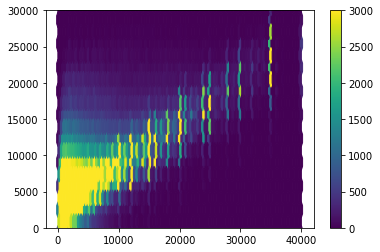

In [25]:
pred = reg.predict(X_test)

plt.hexbin(y_test, pred, vmax = 3000)
plt.ylim(0, 30000)
plt.colorbar()
plt.show()